In [1]:
import pandas as pd
data = pd.read_csv('out2 ccopy 2.csv')
data

,CH5N2,CH3NH3,Rb,Cs,Pb,Sn,I,Br,ETL density(g/cm3),ETL Bandgap(eV),ETL HOMO(eV),ele Molecular Weight,glass Work function,PCE
0,0.500,0.500,0.0,0.00,1.0,0.0,1.5,1.5,6.61,0.65,5.521,107.86800,4.50,20.50
1,0.200,0.400,0.0,0.40,1.0,0.0,1.5,0.0,3.62,2.68,1.367,107.86800,4.50,20.10
2,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,19.04
3,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,5.44,0.72,0.840,107.86800,4.50,18.82
4,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,6.61,0.65,5.521,107.86800,4.50,18.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.000,1.000,0.0,0.00,1.0,0.0,1.5,0.0,3.62,2.68,1.367,196.96657,4.50,8.29
74,0.255,0.595,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,17.60
75,0.850,0.000,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,13.90
76,0.000,0.000,0.0,1.00,1.0,0.0,0.0,3.0,3.62,2.68,1.367,107.86800,4.57,7.93


In [2]:
# 要求Python ≥3.5 
import sys
assert sys.version_info >= (3, 5)

# 要求Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
base_path = os.environ.get("BASE_PATH",'./data/')
data_path = os.path.join(base_path + "lab12/") 
result_path = "result"
img_path = "img"

os.makedirs(result_path, exist_ok=True)

In [4]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(result_path, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
import tensorflow as tf

D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\tensorflow\python\frame

In [6]:
from tensorflow import keras


In [7]:
X = data.values[:, :-1]
y = data.values[:, -1]

In [8]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, 
                                                              y, 
                                                              random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                      y_train_full, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [10]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_random_seed(42)

In [11]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[13]):
    model = keras.models.Sequential()
    # 输入层
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    # 构建多层隐藏层
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    # 输出层
    model.add(keras.layers.Dense(1))
    # 优化器
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    # 模型编译
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [12]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [13]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [14]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 43 samples, validate on 15 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
43/43 [==============================] - 0s 3ms/sample - loss: 174.0540 - val_loss: 154.3573
Epoch 2/100
43/43 [==============================] - 0s 93us/sample - loss: 158.9679 - val_loss: 140.0785
Epoch 3/100
43/43 [==============================] - 0s 70us/sample - loss: 145.1822 - val_loss: 127.8602
Epoch 4/100
43/43 [==============================] - 0s 70us/sample - loss: 133.0291 - val_loss: 116.9607
Epoch 5/100
43/43 [==============================] - 0s 117us/sample - loss: 122.1023 - val_loss: 106.5674
Epoch 6/100
43/43 [==============================] - 0s 93us/sample - loss: 110.6622 - val_loss: 95.1339
Epoch 7/100
43/43 [==============================] - 0s 70us/sample - loss: 98.9957 - val_loss: 85.3036
Epoch 8/100
43/43 [==============================

In [15]:
mse_test = keras_reg.score(X_test, y_test)

20/20 [==============================] - 0s 0s/sample - loss: 27.1133


In [16]:
y_pred = keras_reg.predict(X_test[:3])
y_pred

array([12.085367 ,  6.5691752, 13.397688 ], dtype=float32)

In [17]:
np.random.seed(42)
tf.random.set_random_seed(42)

In [18]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [1, 2, 3, 50, 100, 200],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=10, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=20)])

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Train on 38 samples, validate on 15 samples
Epoch 1/100
38/38 [==============================] - 1s 31ms/sample - loss: 173.2094 - val_loss: 174.3695
Epoch 2/100
38/38 [==============================] - 0s 237us/sample - loss: 171.9915 - val_loss: 173.1036
Epoch 3/100
38/38 [==============================] - 0s 238us/sample - loss: 170.7581 - val_loss: 171.9700
Epoch 4/100
38/38 [==============================] - 0s 238us/sample - loss: 169.6300 - val_loss: 170.7971
Epoch 5/100
38/38 [==============================] - 0s 210us/sample - loss: 168.4645 - val_loss: 169.5928
Epoch 6/100
38/38 [==============================] - 0s 211us/sample - loss: 167.2872 - val_loss: 168.4850
Epoch 7/100
38/38 [==============================] - 0s 264us/sample - loss: 166.1948 - val_loss: 167.4029
Epoch 8/100
38/38 [==============================] - 0s 238us/sample - loss: 165.1391 - val_loss: 166.4116
Epoch 9/100
38/38 [===================

RandomizedSearchCV(cv=10,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000000C7F0DC84A8>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.00477915678487230...
                                                          0.005021425736625637,
                                                  

In [19]:
rnd_search_cv.best_params_

{'n_neurons': 56, 'n_hidden': 200, 'learning_rate': 0.00047938694181253626}

In [20]:
rnd_search_cv.best_score_

-22.73504457473755

In [21]:
rnd_search_cv.score(X_test, y_test)
model = rnd_search_cv.best_estimator_.model
model

20/20 [==============================] - 0s 2ms/sample - loss: 25.9940


In [22]:
model.evaluate(X_test, y_test)

20/20 [==============================] - 0s 1ms/sample - loss: 25.9940


25.993961334228516

In [23]:
y_prediction=model.predict(X_test)
y_prediction.shape

(20, 1)

R2: -2.4549549828615
RMSE: 4.453251443478492
MAE: 3.4484442138671874
R2b: 0.226439233312817
MSE: 19.831448418843276


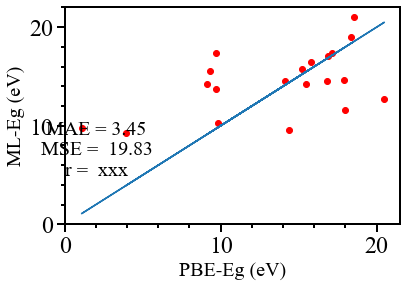

In [24]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from gplearn import genetic
from gplearn.genetic import SymbolicTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.stats import stats
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ensemble  # ensemble learning: 集成学习
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt#计算准确率xgboost
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold


y_prediction=model.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst
# r = pearsonr(y_test, y_prediction)

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)

print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
ax.xaxis.set_ticks([0,10,20])
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
ax.yaxis.set_ticks([0,10,20])
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(2.2, 2.8, 'MAE = %.2f \nMSE =  %.2f \nr =  xxx \n' % (MAE, MSE), fontproperties = 'Times New Roman', size = 20, horizontalalignment='center')
plt.savefig('xgboost-test.tif', dpi=300, bbox_inches = 'tight')
plt.show()

In [ ]:
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, 
#                                                               y, 
#                                                               random_state=42)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
#                                                       y_train_full, random_state=42)
# X = data.values[:, :-1]
# y = data.values[:, -1]

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
kf = KFold(n_splits=10,shuffle=False)  # 初始化KFold
for train_index , test_index in kf.split(X):  # 调用split方法切分数据
    print('train_index:%s , test_index: %s ' %(train_index,test_index))